# Project 2: Investigate the TMDB Dataset (Kaggle data)
[Link to the dataset on Kaggle](https://www.kaggle.com/kevinmariogerard/tmdb-movie-dataset)
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>

<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

#### Use TMdb dataset to answer the following questions:
   > **1**. Rank movies by revenue, budget, and profit, all inflation-adjusted.
   
   > **2**. What kinds of properties are associated with movies that have high revenues? What about high profits?
   
   > **3**. What factors correlate with the profit for a commercially succesfully* movie? (defined by profit greater than 500 mil USD)
   
   > **4**. What are the 10 most popular genres since 1990s?
   
   > **5**. Who are the 10 most active actors/actresses since 2000s?

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [3]:
# Load your data and print out a few lines. Perform operations to inspect data
df= pd.read_csv('tmdb-movies.csv')

In [4]:
# Check the data, number of samples, columns and datatype
df.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

### Clean up the columns

In [5]:
#Drop columns irrelevants to this analysis
#Adjusted budget and adjusted revenue suffice as they allow for apple-to-apple comparison
#Remove revenue and budget
df.drop(['imdb_id','budget','revenue','tagline','homepage','keywords','overview'],axis=1,inplace=True)

In [6]:
#release_date and release_year are both in string format, try fix this with to_date
df.release_date=pd.to_datetime(df.release_date,infer_datetime_format=True)
df.release_date

0       2015-06-09
1       2015-05-13
2       2015-03-18
3       2015-12-15
4       2015-04-01
5       2015-12-25
6       2015-06-23
7       2015-09-30
8       2015-06-17
9       2015-06-09
10      2015-10-26
11      2015-02-04
12      2015-01-21
13      2015-07-16
14      2015-04-22
15      2015-12-25
16      2015-01-01
17      2015-07-14
18      2015-03-12
19      2015-11-18
20      2015-05-19
21      2015-06-15
22      2015-05-27
23      2015-02-11
24      2015-12-11
25      2015-07-23
26      2015-06-25
27      2015-01-24
28      2015-11-06
29      2015-09-09
           ...    
10836   2066-01-01
10837   2066-06-21
10838   2066-11-01
10839   2066-10-27
10840   2066-12-22
10841   2066-10-23
10842   2066-01-01
10843   2066-06-09
10844   2066-01-16
10845   2066-03-01
10846   2066-01-09
10847   2066-06-20
10848   2066-08-24
10849   2066-12-16
10850   2066-02-23
10851   2066-06-22
10852   2066-05-31
10853   2066-03-29
10854   2066-02-17
10855   2066-01-20
10856   2066-02-16
10857   2066

In [7]:
#Some dates are not parsed correctly in the column 'release_date',fix it
from pandas.tseries.offsets import DateOffset
df.release_date=df.release_date.apply(lambda x: x-DateOffset(years=100) if x.year>=2020 else x)

In [8]:
#Check the data
df.describe()

,id,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [9]:
# Drop release_year column because it is redundent now 
df.drop('release_year',axis=1,inplace=True)

### Check missing values and duplicates 

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null datetime64[ns]
vote_count              10866 non-null int64
vote_average            10866 non-null float64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 1.1+ MB


In [11]:
df[df['cast'].isnull()].head()
# They are very unpopular or unsuccessful movies.OK to drop

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj
371,345637,0.422901,Sanjay's Super Team,NaN,Sanjay Patel,7,Animation,Pixar Animation Studios,2015-11-25,47,6.9,0.0,0.0
441,355020,0.220751,Winter on Fire: Ukraine's Fight for Freedom,NaN,Evgeny Afineevsky,98,Documentary,Passion Pictures|Campbell Grobman Films|Afinee...,2015-10-09,37,8.2,0.0,0.0
465,321109,0.201696,Bitter Lake,NaN,Adam Curtis,135,Documentary,BBC,2015-01-24,19,7.8,0.0,0.0
536,333350,0.122543,A Faster Horse,NaN,David Gelb,90,Documentary,NaN,2015-10-08,12,8.0,0.0,0.0
538,224972,0.114264,The Mask You Live In,NaN,Jennifer Siebel Newsom,88,Documentary,NaN,2015-01-01,11,8.9,0.0,0.0


In [12]:
df[df['production_companies'].isnull()].head()
# They are very unpopular or unsuccessful movies.OK to drop

,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj
228,300792,0.584363,Racing Extinction,Elon Musk|Jane Goodall|Louie Psihoyos|Leilani ...,Louie Psihoyos,90,Adventure|Documentary,NaN,2015-01-24,36,7.8,0.0,0.0
259,360603,0.476341,Crown for Christmas,Danica McKellar|Rupert Penry-Jones|Ellie Botte...,Alex Zamm,84,TV Movie,NaN,2015-11-27,10,7.6,0.0,0.0
295,363483,0.417191,12 Gifts of Christmas,Katrina Law|Donna Mills|Aaron O'Connell|Melani...,Peter Sullivan,84,Family|TV Movie,NaN,2015-11-26,12,6.3,0.0,0.0
298,354220,0.370258,The Girl in the Photographs,Kal Penn|Claudia Lee|Kenny Wormald|Toby Heming...,Nick Simon,95,Crime|Horror|Thriller,NaN,2015-09-14,10,4.7,0.0,0.0
328,308457,0.367617,Advantageous,Jacqueline Kim|James Urbaniak|Freya Adams|Ken ...,Jennifer Phang,92,Science Fiction|Drama|Family,NaN,2015-06-23,29,6.4,0.0,0.0


In [13]:
#drop missing data
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 13 columns):
id                      9773 non-null int64
popularity              9773 non-null float64
original_title          9773 non-null object
cast                    9773 non-null object
director                9773 non-null object
runtime                 9773 non-null int64
genres                  9773 non-null object
production_companies    9773 non-null object
release_date            9773 non-null datetime64[ns]
vote_count              9773 non-null int64
vote_average            9773 non-null float64
budget_adj              9773 non-null float64
revenue_adj             9773 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 1.0+ MB


In [14]:
#check duplicatees 
print(df.duplicated().sum())
df[df.duplicated()]

1


,id,popularity,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,budget_adj,revenue_adj
2090,42194,0.59643,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,2010-03-20,110,5.0,30000000.0,967000.0


In [15]:
#Remove duplicates
df.drop_duplicates(inplace=True)

In [16]:
#Double check
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 13 columns):
id                      9772 non-null int64
popularity              9772 non-null float64
original_title          9772 non-null object
cast                    9772 non-null object
director                9772 non-null object
runtime                 9772 non-null int64
genres                  9772 non-null object
production_companies    9772 non-null object
release_date            9772 non-null datetime64[ns]
vote_count              9772 non-null int64
vote_average            9772 non-null float64
budget_adj              9772 non-null float64
revenue_adj             9772 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 1.0+ MB


In [17]:
#change adjusted budget to mil$
df.budget_adj=round(df.budget_adj/1000000,2)
df.budget_adj

0        138.00
1        138.00
2        101.20
3        184.00
4        174.80
5        124.20
6        142.60
7         99.36
8         68.08
9        161.00
10       225.40
11       161.92
12        13.80
13        80.96
14       257.60
15        40.48
16        44.16
17       119.60
18        87.40
19       147.20
20       174.80
21        27.60
22       101.20
23        36.80
24        25.76
25       138.00
26        62.56
27        74.52
28        18.40
29        56.12
          ...  
10834      0.00
10835     80.62
10836      0.00
10837      0.00
10838      0.00
10839      0.00
10840      0.00
10841      0.50
10843      0.00
10844      0.00
10845      0.00
10846      0.00
10847      0.00
10848     34.36
10849      0.00
10850      0.00
10851      0.00
10852      0.00
10854      0.00
10855      4.70
10856      0.00
10857      0.00
10858      0.00
10859      0.00
10860      0.00
10861      0.00
10862      0.00
10863      0.00
10864      0.00
10865      0.13
Name: budget_adj, Length

In [18]:
#And change adjusted revenue to mil$
df.revenue_adj=round(df.revenue_adj/1000000,2)
df.revenue_adj

0        1392.45
1         348.16
2         271.62
3        1902.72
4        1385.75
5         490.31
6         405.36
7         547.75
8        1064.19
9         785.41
10        810.22
11        169.27
12         33.92
13        224.15
14       1292.63
15        143.30
16        299.71
17        477.11
18        498.96
19        598.48
20        192.31
21         84.37
22        432.85
23        524.08
24        122.68
25        627.74
26        198.59
27        371.50
28         81.28
29        286.36
          ...   
10834       0.00
10835     134.36
10836       0.00
10837       0.00
10838       0.00
10839       0.00
10840       0.00
10841       0.00
10843       0.00
10844       0.00
10845       0.00
10846       0.00
10847       0.00
10848      80.62
10849       0.00
10850       0.00
10851       0.00
10852       0.00
10854       0.00
10855       0.00
10856       0.00
10857       0.00
10858       0.00
10859       0.00
10860       0.00
10861       0.00
10862       0.00
10863       0.

In [19]:
#Round up the poluarity score
df.popularity=round(df.popularity,2)

In [20]:
#Check the cleaned data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9772 entries, 0 to 10865
Data columns (total 13 columns):
id                      9772 non-null int64
popularity              9772 non-null float64
original_title          9772 non-null object
cast                    9772 non-null object
director                9772 non-null object
runtime                 9772 non-null int64
genres                  9772 non-null object
production_companies    9772 non-null object
release_date            9772 non-null datetime64[ns]
vote_count              9772 non-null int64
vote_average            9772 non-null float64
budget_adj              9772 non-null float64
revenue_adj             9772 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(3), object(5)
memory usage: 1.0+ MB


<a id='eda'></a>
## Exploratory Data Analysis

### Q1: What are the top movies by revenue, budget and profit?

In [21]:
#Build a function for sorting the data by a particular column with descending order and plot the results with bar charts

def top_titles(column_name, n,start_year=0): 
    if start_year>0:
        top_n= df[df['release_date'] >= str(start_year)].sort_values(column_name,ascending=False)[:n]
    else: top_n = df.sort_values(column_name,ascending=False)[:n]
    sns.barplot(x=column_name,y='original_title',data=top_n,label=column_name)
    med = df[column_name].mean()
    plt.axvline(med,color='k',linestyle='--',label='median')
    plt.xlabel(column_name.capitalize()+'in mil USD')
    plt.ylabel('Title')
    plt.title('Top '+str(n)+' movies by '+column_name)
    plt.legend()
    plt.show()

Inpired by Ayşe Bat's [post](https://medium.com/my-data-camp-journey/investigating-tmdb-movie-datasets-4ee04c263915) on Medium 'Investigating TMDB Movies'

#### 1a: What are the all-time top 10 grossing films?

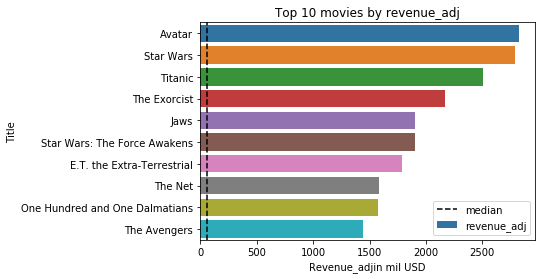

In [22]:
top_titles('revenue_adj',10);

#### 1b: What are the top 10 grossing movies since 2000?

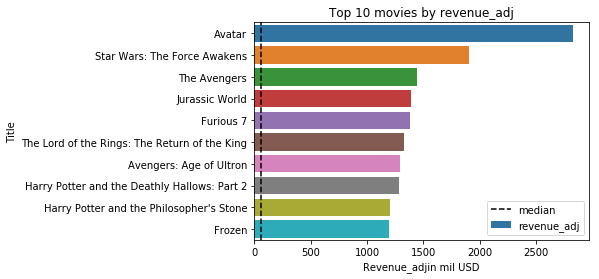

In [23]:
top_titles('revenue_adj',10,2000)

In [24]:
# create a new profit column
df['profit']=df['revenue_adj']-df['budget_adj']

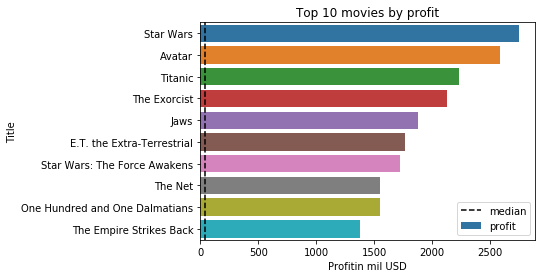

In [25]:
top_titles('profit',10)

#### 1d: What are the 10 most profitable movies since 2000?

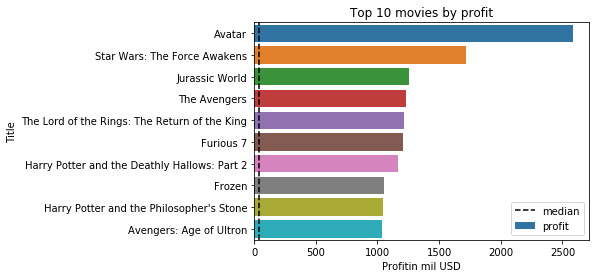

In [26]:
top_titles('profit',10,2000)

#### 1e: What are the 10 most expensive movies of all time?

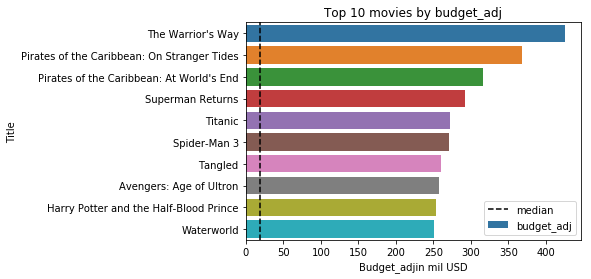

In [27]:
top_titles('budget_adj',10)

#### 1f: What are the 10 most expensive movies since 2000?

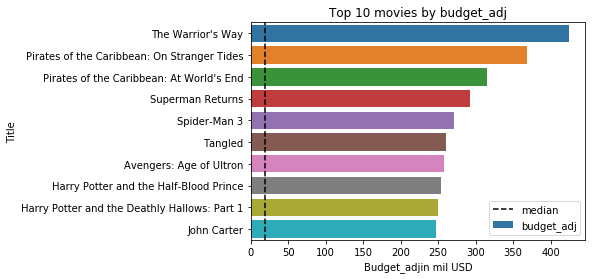

In [28]:
top_titles('budget_adj',10,2000)

### Q2: What kinds of properties are associated with movies that have high revenues? What about high profits?

##### 2a: Show the stats for movies with revenues higher than the median

In [29]:
df.query('revenue_adj>revenue_adj.median()').describe()

,id,popularity,runtime,vote_count,vote_average,budget_adj,revenue_adj,profit
count,4686.000000,4686.000000,4686.000000,4686.000000,4686.000000,4686.000000,4686.000000,4686.000000
mean,43959.290440,1.070734,108.284891,449.896714,6.156765,36.220386,118.976242,82.755856
std,72038.170157,1.372528,21.109122,816.882281,0.794326,44.068664,201.167602,178.803478
min,5.000000,0.000000,26.000000,10.000000,2.100000,0.000000,0.010000,-413.910000
25%,8066.500000,0.410000,95.000000,51.000000,5.700000,3.585000,12.740000,0.270000
50%,11923.000000,0.700000,105.000000,158.000000,6.200000,21.630000,47.265000,23.550000
75%,42296.750000,1.240000,118.000000,455.750000,6.700000,50.680000,136.907500,90.677500
max,417859.000000,32.990000,705.000000,9767.000000,8.400000,425.000000,2827.120000,2750.130000


##### 2b: Show the stats for movies with profits higher than the median

In [30]:
df.query('profit>profit.median()').describe()

,id,popularity,runtime,vote_count,vote_average,budget_adj,revenue_adj,profit
count,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000,3658.000000
mean,43934.279114,1.194636,108.575998,536.531711,6.244013,36.124978,147.005448,110.880470
std,73226.520484,1.511563,21.685672,900.262193,0.778121,46.251977,219.335303,192.887389
min,5.000000,0.000000,26.000000,10.000000,2.100000,0.000000,0.010000,0.010000
25%,6076.500000,0.440000,95.000000,61.000000,5.725000,0.000000,24.312500,12.147500
50%,11563.000000,0.790000,105.000000,200.500000,6.300000,20.180000,73.150000,44.035000
75%,41213.750000,1.390000,118.000000,589.000000,6.800000,50.820000,177.117500,123.902500
max,417859.000000,32.990000,705.000000,9767.000000,8.400000,368.370000,2827.120000,2750.130000


### Q3:What factors correlate with the profit for a commercially succesfully* movie?
*Commercial success defined by profit greater than 500 mil USD

In [31]:
#Create functions to plot the relationship
def rel(col_name):
    plt.scatter(col_name,'profit',data=df.query('profit>500'))
    if col_name=='budget_adj':
        plt.xlabel(col_name.capitalize()+' in mil USD')
    else:plt.xlabel(col_name.capitalize())
    plt.ylabel('profit in mil USD');

##### Relationship between budget and profit

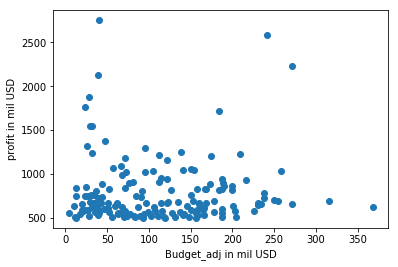

In [32]:
rel('budget_adj')

##### Relationship between popularity and profit

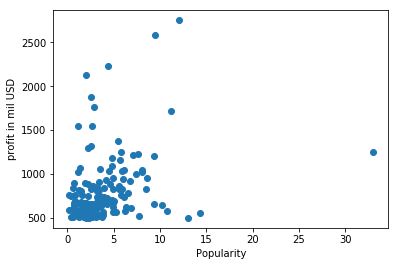

In [33]:
rel('popularity')

##### Relationship between vote count and profit

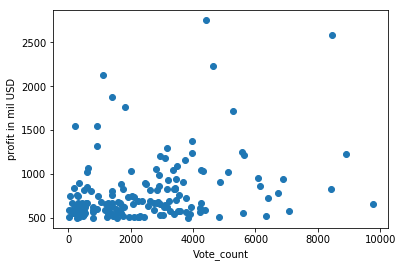

In [34]:
rel('vote_count')

##### Relationship between vote average and profit

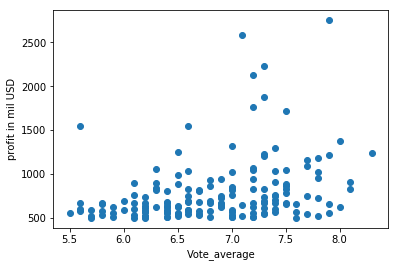

In [35]:
rel('vote_average')

##### Relationship between runtime and profit

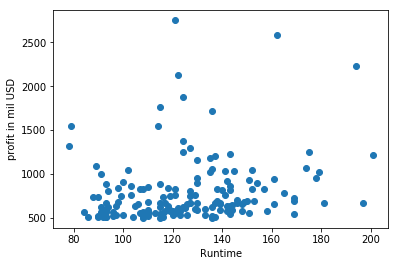

In [36]:
rel('runtime')

##### Popularity, budget, vote count, vote average and runtime all have a positive relationship with profit.

### Q3: Who are the best performing directors and what are their winning titles?
#### 3a: Who are the top 5 directors by total revenues?

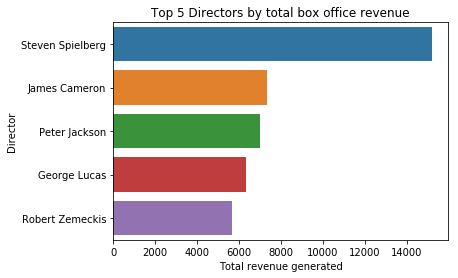

In [37]:
top_dir = df.groupby('director').revenue_adj.sum().sort_values(ascending=False)[:5]
sns.barplot(top_dir.values,top_dir.index)
plt.xlabel('Total revenue generated')
plt.ylabel('Director')
plt.title('Top 5 Directors by total box office revenue');

#### 3b: What is the biggest hit for each director and what's the box office revenue?

In [38]:
#Select movies from the top 5 directors with the highest revenues
best4_dir = df.loc[df[df['director'].isin(top_dir.index.tolist())].groupby('director').revenue_adj.idxmax()].sort_values('revenue_adj',ascending=False)
best4_dir['director_title']= best4_dir.director.str.cat(best4_dir.original_title,sep="/")

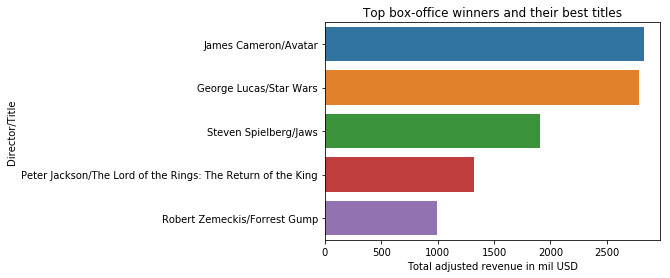

In [39]:
#Plot the result
sns.barplot('revenue_adj','director_title',data=best4_dir)
plt.xlabel('Total adjusted revenue in mil USD')
plt.ylabel('Director/Title')
plt.title('Top box-office winners and their best titles');

#### Compare this result to that of question 1, we spot overlaps and differences:
>1.James Cameron's Avatar, George Lucas' Star Wars and Steven Spielberg's Jaws are on both list

>2.Titanic and the Exocist don't appear because we only show the best for each director here. Cameron has two movies out of all-time top 5 and Titanic is not shown here. Likewise,the Exocist's director William Friedkin is not among the top 5 directors by total revenue.

### Q4: The 10 most popular genres since 1990s?

Some columns contain multiple values, we need to parse them first

In [40]:
#Create a function to find the most popular genres during a given period and plot the results
def split_col(col_name,n): 
    #n, the top n results to be selected
    str_yr=input('Since which year? (any value >=1966)')
    end_yr=input('Until which year? (any value <=2015)')             
    df1=df[(df['release_date'] >=str_yr) & (df['release_date']<=str(int(end_yr)+1))]
    df2=df1[col_name].str.cat(sep="|")
    df3=pd.Series(df2.split("|")).value_counts(ascending=False).head(n)
    sns.barplot(df3.values,df3.index)
    plt.ylabel(col_name.capitalize())
    plt.xlabel('No. of movies')
    plt.title('The '+str(n)+' most popuplar '+col_name+' from '+str_yr+' to '+end_yr)

Since which year? (any value >=1966)1990
Until which year? (any value <=2015)2015


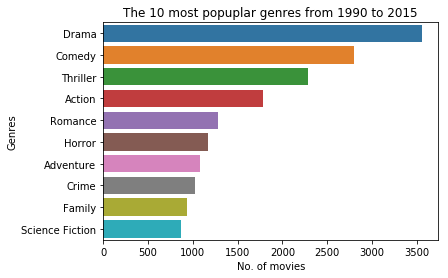

In [42]:
#Find the top 10 genres since the 90s
split_col('genres',10)

### Q4: 10 most popular* actors/actresses since 2000?
##### *defined by the number of movies they appeared

Since which year? (any value >=1966)2000
Until which year? (any value <=2015)2015


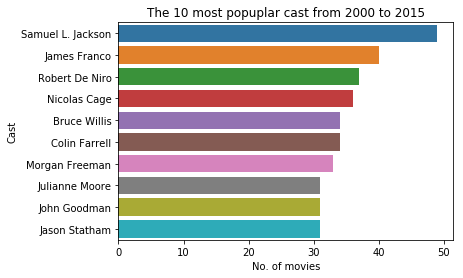

In [44]:
split_col('cast',10)

<a id='conclusions'></a>
## Conclusions

> **1**. The lists of the highest grossing, the most profitable and the most expensive movies have overlaps and distinctions. For instance, Waterworld's budget is the 9th highest of all time but it is neither the 10 most profitable or the top 10 grossing.

> **2**. Popularity, budget, vote count, vote average and runtime all have a positive relationship with profit and it is worth doing more statistical tests.

> **3**. Spielburg has generated more box office revenue than any other directors during 1966-2015.

> **4**. From 1990 to 2015, the most popular genre is Drama.

> **5**. Samuel Jackson casted in the highest number of movies post 2000.

### Limitations

> **1**: For Q2, plots charts cannot confirm casuality or indicate statistical significance. More tests need to be done.

> **2**: It doesn't specify for entries with multiple values, whether those values are ranked by importance or relevancy. E.g For an entry like Drama/Romance/Sci-fi, does it imply the movie is more a drama than a sci-fi? By parsing the values in genres/casts and counting the occurences, I assume that order doesn't matter, although it normally does in real life. 